<a href="https://colab.research.google.com/github/Binaaa04/magang_DataScience/blob/main/Data_Sains_Sabrina_Rahmadini_Tugas_Modul_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DIVISI DATA SCIENCE
“PENUGASAN 4 : EXPLORATORY DATA ANALYSIS”



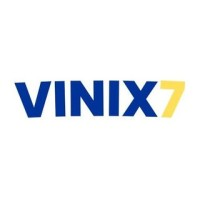




Nama : Sabrina Rahmadini

Paket : Basic

Universitas : Politeknik Negeri Malang


In [ ]:
import numpy as np
import pandas as pd

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/MAGANG/DATA SCIENCE/dirty_cafe_sales.csv', low_memory=False)

# ======= 1. Info Awal Data =======
#
print("Informasi Dataset:")
df.info()

# Melihat apakah ada nilai yang kosong
print("\nMissing Value per Kolom:")
print(len(df.isnull().sum()))
print(df.isnull().sum())

print("\nStatistik Deskriptif:")
print(df.describe())

# Melihat apakah ada data duplikat atau tidak
print("\nJumlah Data Duplikat:")
print(df.duplicated().sum())

# Melihat apakah sudak sesuai tipe datanya
print("\n Tipe data:")
print(df.dtypes)
print(" ")

# Melihat apakah terdapat data outliers
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')
Q1 = df['Total Spent'].quantile(0.25)
Q3 = df['Total Spent'].quantile(0.75)
IQR = Q3 - Q1
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

outliers = df[(df['Total Spent'] < batas_bawah) | (df['Total Spent'] > batas_atas)]
print("Jumlah outliers:", len(outliers))
print(outliers)


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB

Missing Value per Kolom:
8
Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

Statistik Deskriptif:
       Transaction ID   Item Quantity Price Per Unit Total Spent  \
count           10000   9667     9862   

In [ ]:
# MENGATASI DATA YANG TIDAK SESUAI TIPE DATANYA
import pandas as pd

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/MAGANG/DATA SCIENCE/dirty_cafe_sales.csv', low_memory=False)

# Melihat tipe data awal setiap kolom
print("\nTipe data awal:")
print(df.dtypes)
print(" ")

# Mengubah tipe data Total Spent dari string (object) ke numerik
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')

# Mengubah tipe data Transaction Date dari string ke datetime
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

# Mengubah tipe data Price Per Unit dari string (object) ke numerik
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')

print(" ")
print("\nTipe data setelah diperbaiki:")
print(df.dtypes)
print(" ")



Tipe data awal:
Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object
 
 

Tipe data setelah diperbaiki:
Transaction ID              object
Item                        object
Quantity                    object
Price Per Unit             float64
Total Spent                float64
Payment Method              object
Location                    object
Transaction Date    datetime64[ns]
dtype: object
 


In [ ]:
# MENGATASI DATA YG MISSING VALUES
import pandas as pd

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/MAGANG/DATA SCIENCE/dirty_cafe_sales.csv', low_memory=False)

# Melihat apakah ada nilai yang kosong
print("\nMissing Value per Kolom:")
print(len(df.isnull().sum()))
print(df.isnull().sum())

# mengisi kolom total spent, price per unit dan transaction date yang kosong dengan median
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')
df['Total Spent'] = df['Total Spent'].fillna(df['Total Spent'].median())
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
df['Transaction Date'] = df['Transaction Date'].fillna(df['Transaction Date'].median())
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Price Per Unit'] = df['Price Per Unit'].fillna(df['Price Per Unit'].median())

# mengisi kolom quantity, payment method, location dan item yang kosong dengan modus
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].mode()[0])
df['Item'] = df['Item'].fillna(df['Item'].mode()[0])
df['Payment Method'] = df['Payment Method'].fillna(df['Payment Method'].mode()[0])
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])

print(" ")
print("\nMissing Value per Kolom setelah diperbaiki:")
print(df.isnull().sum())




Missing Value per Kolom:
8
Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64
 

Missing Value per Kolom setelah diperbaiki:
Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64


Jumlah outliers: 259
     Transaction ID     Item Quantity  Price Per Unit  Total Spent  \
10      TXN_2548360    Salad        5             5.0         25.0   
51      TXN_6342161    Salad        5             5.0         25.0   
52      TXN_8914892  UNKNOWN        5             5.0         25.0   
96      TXN_5220895    Salad        5             5.0         25.0   
100     TXN_9517146    Juice        5             5.0         25.0   
...             ...      ...      ...             ...          ...   
9791    TXN_1232346    Salad        5             5.0         25.0   
9805    TXN_9506076    Salad        5             5.0         25.0   
9879    TXN_6393305    Salad        5             5.0         25.0   
9908    TXN_8922585    Salad        5             5.0         25.0   
9971    TXN_6120851    Salad        5             5.0         25.0   

      Payment Method  Location Transaction Date  
10              Cash  Takeaway       2023-11-07  
51             ERROR  Takeaway       2

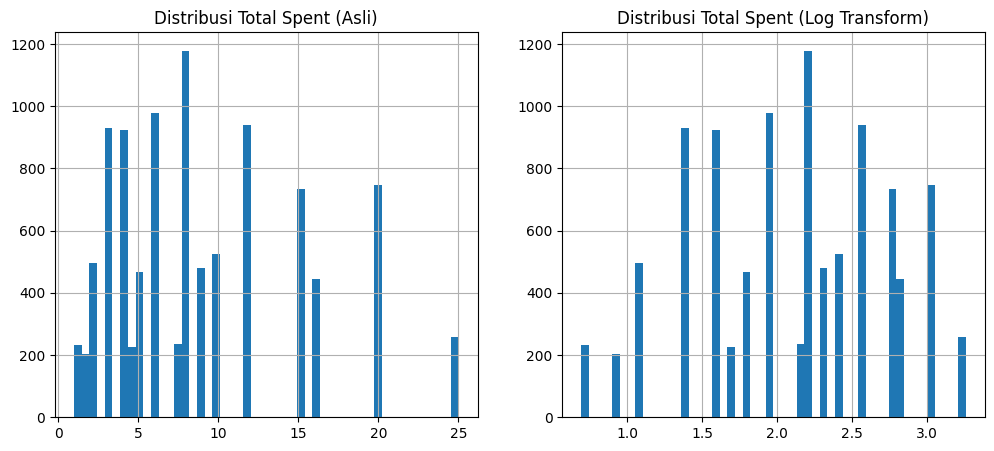

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/MAGANG/DATA SCIENCE/dirty_cafe_sales.csv', low_memory=False)

# mengisi kolom total spent, price per unit dan transaction date yang kosong dengan median
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')
df['Total Spent'] = df['Total Spent'].fillna(df['Total Spent'].median())
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
df['Transaction Date'] = df['Transaction Date'].fillna(df['Transaction Date'].median())
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Price Per Unit'] = df['Price Per Unit'].fillna(df['Price Per Unit'].median())

# mengisi kolom quantity, payment method, location dan item yang kosong dengan modus
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].mode()[0])
df['Item'] = df['Item'].fillna(df['Item'].mode()[0])
df['Payment Method'] = df['Payment Method'].fillna(df['Payment Method'].mode()[0])
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])

# Melihat apakah terdapat data outliers
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')
Q1 = df['Total Spent'].quantile(0.25)
Q3 = df['Total Spent'].quantile(0.75)
IQR = Q3 - Q1
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

outliers = df[(df['Total Spent'] < batas_bawah) | (df['Total Spent'] > batas_atas)]
print("Jumlah outliers:", len(outliers))
print(outliers)

# Tambah kolom log untuk visualisasi (grafik)
df['Log_Total_Spent'] = np.log1p(df['Total Spent'])

plt.figure(figsize=(12,5))

# Gambaran grafik ketika menggunakan kolom total spent yang digunakan untuk analisis
plt.subplot(1,2,1)
df['Total Spent'].hist(bins=50)
plt.title("Distribusi Total Spent (Asli)")

# Gambaran grafik ketika menggunakan kolom total spent yang digunakan untuk visualisasi
plt.subplot(1,2,2)
df['Log_Total_Spent'].hist(bins=50)
plt.title("Distribusi Total Spent (Log Transform)")

plt.show()

# Simpan hasil bersih ke file CSV
df.to_csv("/content/drive/MyDrive/MAGANG/DATA SCIENCE/dataSalesCafeClean.csv", index=False)